# 🧪 H(e,e′p) Elastic Analysis — Detector Offset Runs

In this notebook, we analyze a series of **H(e,e′p)** elastic *singles* runs to extract detector offsets. Each run corresponds to a specific spectrometer setting. The High Momentum Spectrometer (HMS) is used to detect the scattered electron or proton depending on the configuration, and the goal is to refine offset parameters such as angles and momentum calibration for improved reconstruction accuracy.

---

## 📋 Run Details

| Setting | Run(s)            | Beam Energy (GeV) | HMS Angle (deg) | HMS Central Momentum (GeV) |
|--------:|-------------------|------------------:|-----------------:|----------------------------:|
| 1       | 1249              | 10.5439           | 12.395           | 6.117                       |
| 2       | 1250, 1251        | 10.5436           | 19.260           | 6.117                       |
| 3       | 1252              | 10.5433           | 20.700           | 6.117                       |
| 4       | 1253              | 10.5435           | 20.700(check)           | 6.117                       |
| 5       | 1534              | 10.5437           | 19.145           | 6.667                       |
| 6       | 1535              | 10.5437           | 17.995           | 6.667                       |
| 7       | 1536              | 10.5436           | 16.850           | 6.667                       |
| 8       | 1714              | 10.5440           | 22.830           | 5.878                       |
| 9       | 1715, 1716        | 10.5440           | 21.680           | 5.878                       |
| 10      | 6705, 6828–6840   | 6.3972            | 24.860           | 4.042                       |

---

## 🛠️ Analysis Goals

- Perform elastic peak fitting to extract the momentum and angle offsets.
- Compare reconstructed kinematics with expected elastic kinematics.
- Optimize detector calibration parameters based on residuals.
- Cross-check offsets across different settings and beam energies.

---

## 📐 Formulae and Kinematic Relations

*To be included later.*

---

📌 *Note: Ensure that the appropriate HMS polarity and acceptance settings are used for each run group.*


In [6]:
import pandas as pd

# Define the elastic settings and placeholder values for dw
data = [
    [1, "1249",           10.54386781, 12.395, 6.117],
    [2, "1250",           10.54364850, 19.260, 6.117],
    [3, "1251",           10.54330237, 19.260, 6.117],
    [4, "1252",           10.54346881, 20.700, 6.117],
    [5, "1253",           10.54353183, 22.120, 6.117],
    [6, "1534",           10.54371873, 19.145, 6.667],
    [7, "1535",           10.54366713, 17.995, 6.667],
    [8, "1536",           10.54363166, 16.850, 6.667],
    [9, "1714",           10.54402191, 22.830, 5.878],
    [10, "1715, 1716",     10.5440, 21.680, 5.878],
    [11, "6828–6840",     6.3972, 24.860, 4.042]
]

# Column names for the CSV
columns = ["Setting", "Runs", "Beam_E_GeV", "HMS_Angle_deg", "HMS_P0_GeV"]

# Create DataFrame
df_settings = pd.DataFrame(data, columns=columns)

# Save to CSV
df_settings.to_csv("settings.csv", index=False)

# Display the DataFrame
df_settings


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV
0,1,1249,10.543868,12.395,6.117
1,2,1250,10.543648,19.260,6.117
2,3,1251,10.543302,19.260,6.117
3,4,1252,10.543469,20.700,6.117
4,5,1253,10.543532,22.120,6.117
5,6,1534,10.543719,19.145,6.667
6,7,1535,10.543667,17.995,6.667
7,8,1536,10.543632,16.850,6.667
8,9,1714,10.544022,22.830,5.878
9,10,"1715, 1716",10.544000,21.680,5.878


## 🧮 Proton Kinematics Calculation from Beam and Electron Scattering Data

This section computes the **proton scattering angle** and **momentum** in elastic H(e,e'p) events using basic two-body kinematics.

### ✏️ Inputs:
- Beam energy $ E_{\text{beam}} $
- Scattered electron angle \( \theta_e \)
- Scattered electron momentum \( P_e \)

### 📤 Outputs:
- Proton scattering angle \( \theta_p \)
- Proton momentum \( P_p \)
- Computed electron momentum from elastic kinematics $ P_e^{\text{elastic}} $

The calculation uses energy-momentum conservation under the assumption of elastic scattering off a stationary proton.

---


In [7]:
import math

def calculate_proton_properties(beam_energy, electron_angle, electron_momentum):
    """
    Calculate the proton angle and momentum based on elastic kinematics.

    Parameters:
    beam_energy (float): Beam energy in GeV.
    electron_angle (float): Scattered electron angle θ_e in degrees.
    electron_momentum (float): Measured scattered electron momentum P_e in GeV.

    Returns:
    tuple: (Proton angle θ_p in degrees, proton momentum P_p in GeV, calculated elastic P_e in GeV)
    """
    mass_e = 0.000511  # GeV
    mass_p = 0.938272  # GeV

    initial_momentum = math.sqrt(beam_energy**2 - mass_e**2)
    theta_e_rad = math.radians(electron_angle)

    pe_elastic = initial_momentum / (1 + (2 * initial_momentum / mass_p) * (math.sin(theta_e_rad / 2))**2)

    tan_theta_p = (pe_elastic * math.sin(theta_e_rad)) / (initial_momentum - pe_elastic * math.cos(theta_e_rad))
    theta_p = math.atan(tan_theta_p)
    theta_p_deg = math.degrees(theta_p)

    pp = math.sqrt((initial_momentum + mass_p - pe_elastic)**2 - mass_p**2)

    return theta_p_deg, pp, pe_elastic


In [8]:
import pandas as pd

# Load the settings CSV
df = pd.read_csv("settings.csv")

# Lists to store results
proton_angles = []
proton_momenta = []
pe_kin_calc = []

# Loop over each row and compute kinematics
for _, row in df.iterrows():
    beam_E = row["Beam_E_GeV"]
    theta_e = row["HMS_Angle_deg"]
    pe_measured = row["HMS_P0_GeV"]

    theta_p, pp, pe_calc = calculate_proton_properties(beam_E, theta_e, pe_measured)
    
    proton_angles.append(theta_p)
    proton_momenta.append(pp)
    pe_kin_calc.append(pe_calc)

# Add new columns to DataFrame
df["Proton_Angle_deg"] = proton_angles
df["Proton_P_GeV"] = proton_momenta
df["Electron_P_GeV"] = pe_kin_calc

# Show and save updated table
df.to_csv("settings_with_kinematics.csv", index=False)
df


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV,Proton_Angle_deg,Proton_P_GeV,Electron_P_GeV
0,1,1249,10.543868,12.395,6.117,36.961912,2.982732,8.355313
1,2,1250,10.543648,19.260,6.117,25.715849,4.920539,6.472723
2,3,1251,10.543302,19.260,6.117,25.716524,4.920319,6.472593
3,4,1252,10.543469,20.700,6.117,24.106061,5.288494,6.110658
4,5,1253,10.543532,22.120,6.117,22.688132,5.633526,5.770677
5,6,1534,10.543719,19.145,6.667,25.852658,4.890434,6.502362
6,7,1535,10.543667,17.995,6.667,27.297711,4.583160,6.803723
7,8,1536,10.543632,16.850,6.667,28.886560,4.267684,7.112294
8,9,1714,10.544022,22.830,5.878,22.033810,5.799436,5.607448
9,10,"1715, 1716",10.544000,21.680,5.878,23.110141,5.528918,5.874305


# Starting the analysis

In [34]:
# === Define setting-to-SIMC mapping ===
setting_to_simcfile = {
    1: "eep_hydrogen_1249.root",
    2: "eep_hydrogen_1250.root",
    3: "eep_hydrogen_1251.root",
    4: "eep_hydrogen_1252.root",
    5: "eep_hydrogen_1253.root",
    6: "eep_hydrogen_1534.root",
    7: "eep_hydrogen_1535.root",
    8: "eep_hydrogen_1536.root",
    9: "eep_hydrogen_1714.root",
    10: "eep_hydrogen_1715_1716.root",  # you may average 1715+1716 or pick one
    11: "eep_hydrogen_6828_6841.root",  # or a merged file
}

# === Normalization factors for SIMC (normfac / nevents) ===
normfac_map = {
    1: 0.136637E+08,
    2: 0.166423E+08,
    3: 0.166435E+08,
    4: 0.164118E+08,
    5: 0.141986E+08,
    6: 0.161662E+08,
    7: 0.167196E+08,
    8: 0.167047E+08,
    9: 0.150197E+08,
    10: 0.163935E+08,
    11: 0.160009E+08
}

# === Effective charge in millicoulombs (after all efficiency corrections) ===
effective_charge_map = {
    1: 1,
    2: 39.5321,
    3: 35.1559,
    4: 23.715,
    5: 53.3532,
    6: 50.9944,
    7: 50.328,
    8: 47.3672,
    9: 68.8866,
    10: (99.026 + 79.0843),  # merged
    11: 34.4342 + 37.3549 + 38.8534 + 40.5628 + 34.9966 + 33.6797 + 46.9562 + 31.9774 + 41.2885 + 5.69914 + 40.4742 + 35.1548 + 35.5669  # sum for 6828-6840
}

# Total number of SIMC events (same across files typically)
nevents_simc = 100000


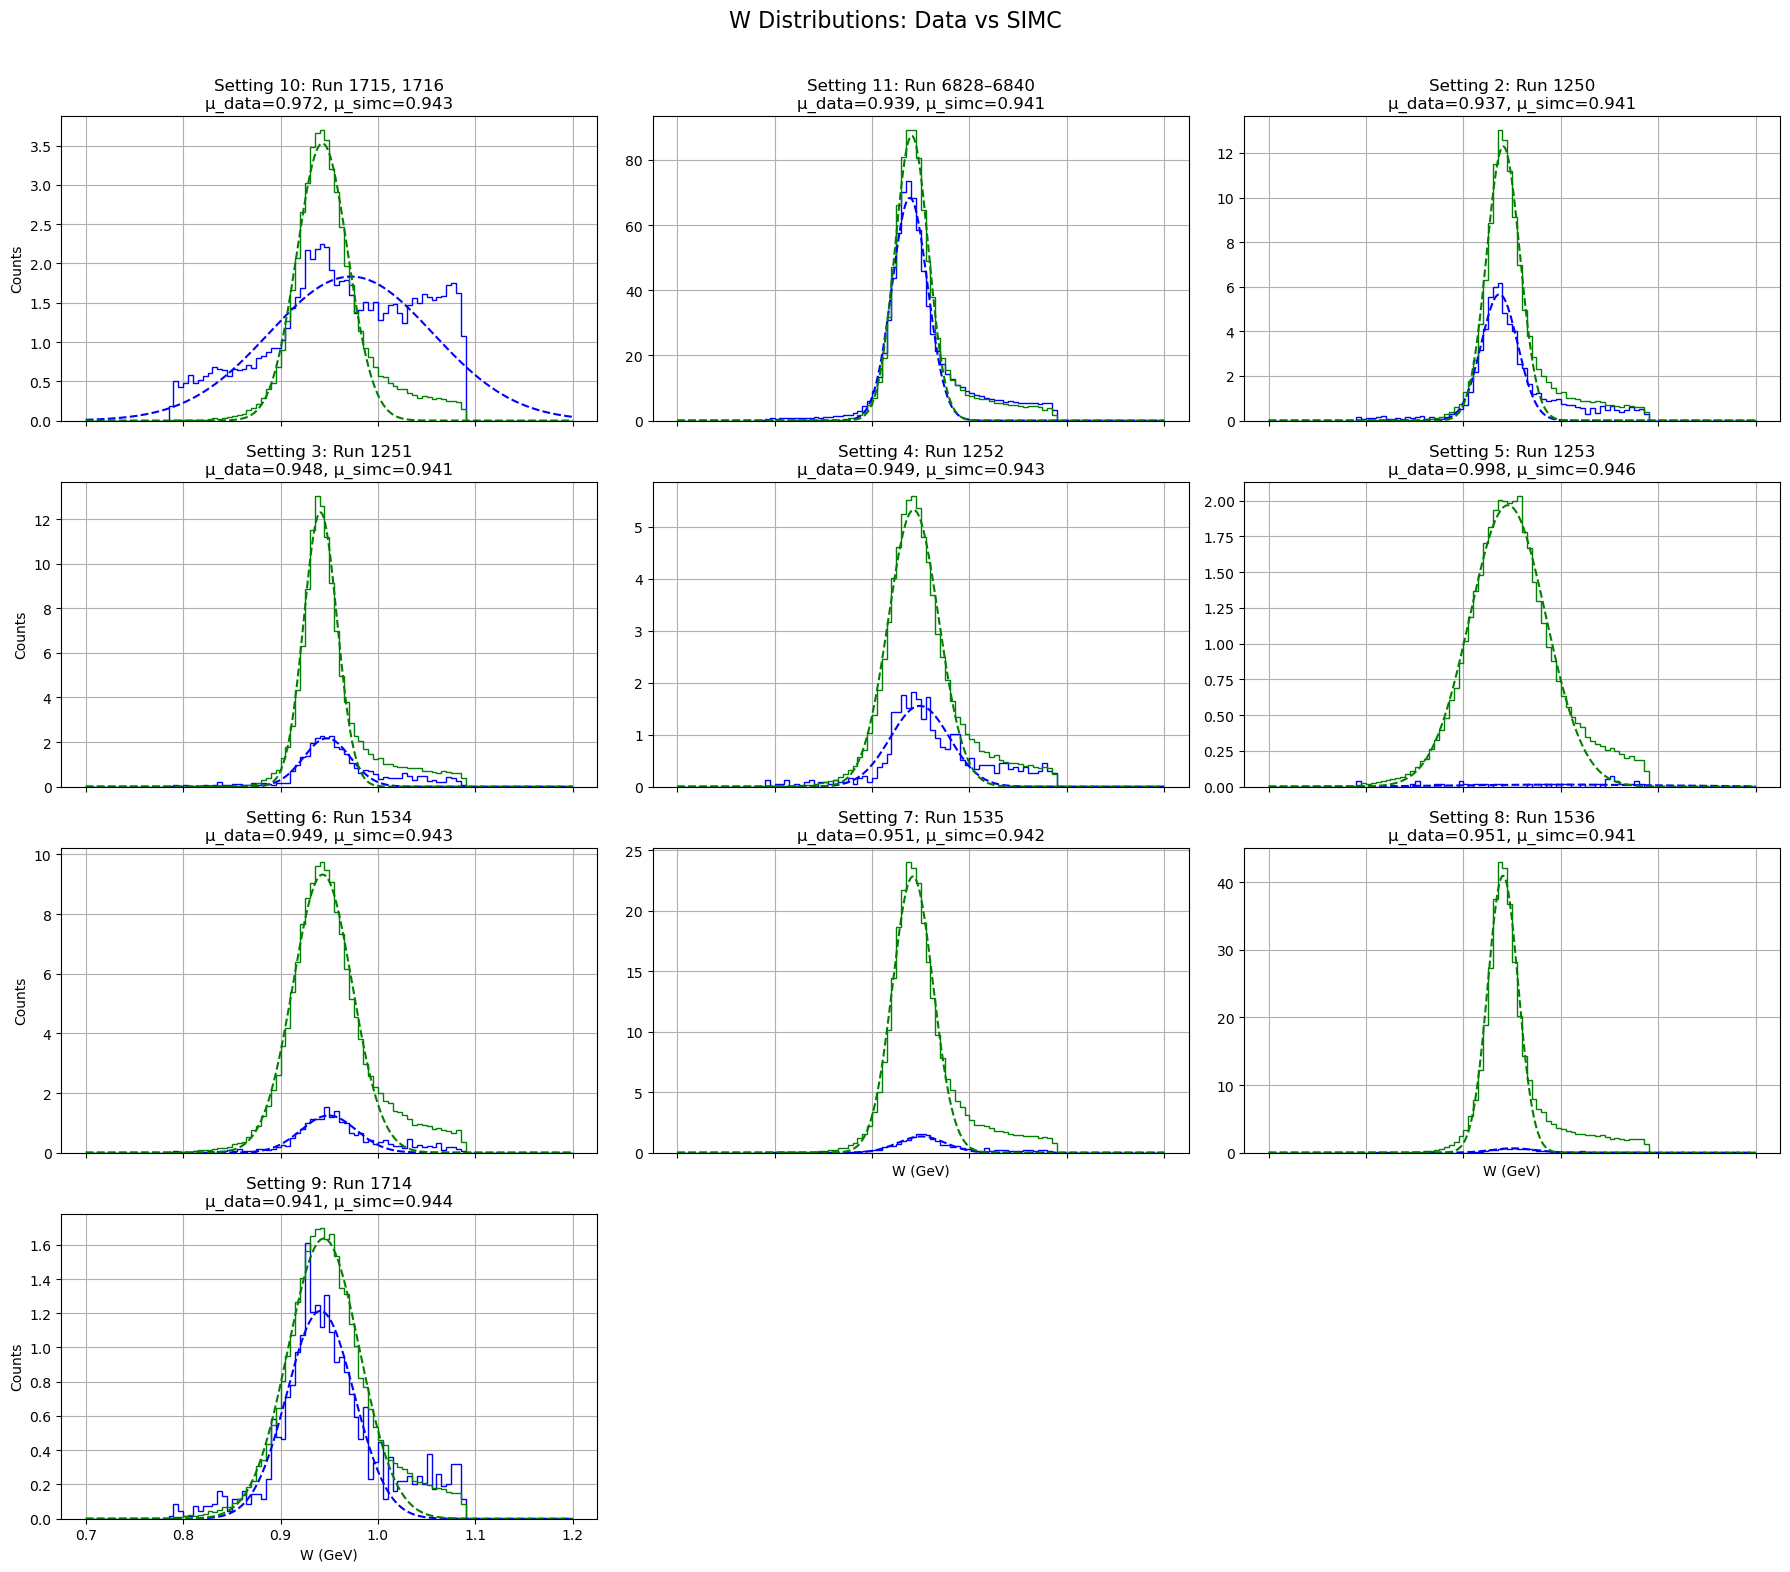

✅ Updated CSV saved to settings_with_kinematics.csv
✅ W diagnostic analysis complete.


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV,Proton_Angle_deg,Proton_P_GeV,Electron_P_GeV,mu_data,mu_simc,dWmeas,sigma_data,sigma_simc
0,1,1249,10.543868,12.395,6.117,36.961912,2.982732,8.355313,NaN,NaN,NaN,NaN,NaN
1,2,1250,10.543648,19.260,6.117,25.715849,4.920539,6.472723,0.936932,0.940913,-0.003981,0.018715,0.017118
2,3,1251,10.543302,19.260,6.117,25.716524,4.920319,6.472593,0.947652,0.940915,0.006737,0.023999,0.017119
3,4,1252,10.543469,20.700,6.117,24.106061,5.288494,6.110658,0.949157,0.942691,0.006466,0.030445,0.025860
4,5,1253,10.543532,22.120,6.117,22.688132,5.633526,5.770677,0.998396,0.945652,0.052743,0.102650,0.038977
5,6,1534,10.543719,19.145,6.667,25.852658,4.890434,6.502362,0.949383,0.943197,0.006187,0.028502,0.030364
6,7,1535,10.543667,17.995,6.667,27.297711,4.583160,6.803723,0.950845,0.941958,0.008887,0.024353,0.020866
7,8,1536,10.543632,16.850,6.667,28.886560,4.267684,7.112294,0.951251,0.940603,0.010648,0.022819,0.015648
8,9,1714,10.544022,22.830,5.878,22.033810,5.799436,5.607448,0.940996,0.944333,-0.003336,0.034378,0.036661
9,10,"1715, 1716",10.544000,21.680,5.878,23.110141,5.528918,5.874305,0.972201,0.942936,0.029264,0.084100,0.026147


In [58]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os
import pandas as pd

# === Settings ===
data_dir = "./data/merged_elastics"
simc_dir = "./data/simc"
output_dir = "diagnostic_plots"
settings_csv_path = "settings_with_kinematics.csv"
os.makedirs(output_dir, exist_ok=True)

# === Gaussian Fit ===
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def fit_gaussian(hist_vals, bin_edges):
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    A0 = np.max(hist_vals)
    mu0 = bin_centers[np.argmax(hist_vals)]
    sigma0 = np.std(bin_centers)
    try:
        popt, _ = curve_fit(gauss, bin_centers, hist_vals, p0=[A0, mu0, sigma0])
        return popt
    except RuntimeError:
        return None

# === W Extractor ===
def extract_w(filename, branch="W", normalize=False, normfac=None):
    with uproot.open(filename) as f:
        if branch == "H.kin.W":
            tree = f["T"]
            data = tree.arrays(["H.kin.W", "H.cal.etottracknorm", "H.cer.npeSum", "H.gtr.th", "H.gtr.ph"], library="np")
            W = data["H.kin.W"]
            mask = (
                (abs(W - 0.938) < 0.15) &
                (data["H.cal.etottracknorm"] > 0.9) &
                (data["H.cer.npeSum"] > 0.5) &
                (abs(data["H.gtr.th"]) < 0.09) &
                (abs(data["H.gtr.ph"]) < 0.055)
            )
            return W[mask]

        elif branch == "W":
            tree = f["h10"]
            simc = tree.arrays(["W", "hsxptar", "hsyptar", "Weight"], library="np")
            W = simc["W"]
            weights = simc["Weight"]
            mask = (
                (abs(W - 0.938) < 0.15) &
                (abs(simc["hsxptar"]) < 0.09) &
                (abs(simc["hsyptar"]) < 0.055)
            )
            W_sel = W[mask]
            Weights_sel = weights[mask]
            if normalize and normfac:
                return W_sel, Weights_sel * (normfac / nevents_simc)
            else:
                return W_sel

# === Analysis ===
results = []
bins = 100
range_W = (0.7, 1.2)
all_data = sorted(glob.glob(f"{data_dir}/merged_setting_*.root"))


ncols = 3
nrows = int(np.ceil(len(all_data) / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 4), sharex=True, sharey=False)
axs = axs.flatten()
plot_idx = 0


for i, data_file in enumerate(all_data):
    setting = os.path.basename(data_file).split("_")[-1].replace(".root", "")
    if not setting.isdigit():
        print(f"Invalid setting format: {setting}")
        continue
    setting_int = int(setting)

    if setting_int not in setting_to_simcfile:
        print(f"Skipping setting {setting_int}: SIMC mapping not found.")
        continue
    simc_file = os.path.join(simc_dir, setting_to_simcfile[setting_int])
    if not os.path.exists(simc_file):
        print(f"Skipping setting {setting_int}: SIMC file not found.")
        continue

    # Extract and histogram
    data_W = extract_w(data_file, "H.kin.W")
    simc_result = extract_w(simc_file, "W", normalize=True, normfac=normfac_map.get(setting_int))
    simc_W, simc_weights = simc_result if isinstance(simc_result, tuple) else (simc_result, np.ones_like(simc_result))

    if len(data_W) == 0 or len(simc_W) == 0:
        print(f"No W entries for setting {setting_int}")
        continue

    hist_data, bins_data = np.histogram(data_W, bins=bins, range=range_W)
    hist_simc, _ = np.histogram(simc_W, bins=bins, range=range_W, weights=simc_weights)

    if setting_int in effective_charge_map:
        hist_data = hist_data / effective_charge_map[setting_int]

    fit_data = fit_gaussian(hist_data, bins_data)
    fit_simc = fit_gaussian(hist_simc, bins_data)
    if fit_data is None or fit_simc is None:
        print(f"Fit failed for setting {setting_int}")
        continue

    A_d, mu_d, sig_d = fit_data
    A_s, mu_s, sig_s = fit_simc
    dW = mu_d - mu_s

    results.append({
        "setting": setting_int,
        "mu_data": mu_d,
        "mu_simc": mu_s,
        "dWmeas": dW,
        "sigma_data": sig_d,
        "sigma_simc": sig_s
    })

    run_label = df_settings[df_settings["Setting"] == setting_int]["Runs"].values[0]
    eff_charge = effective_charge_map[setting_int]
    weights_data = (1 / eff_charge) * np.ones_like(data_W)


    # Plot
    xfit = np.linspace(*range_W, 500)
    ax = axs[plot_idx]
    ax.hist(data_W, bins=bins, range=range_W, weights=weights_data, histtype='step', color='blue', label='Data')
    ax.hist(simc_W, bins=bins, range=range_W, weights=simc_weights, histtype='step', color='green', label='SIMC')
    ax.plot(xfit, gauss(xfit, *fit_data), 'b--')
    ax.plot(xfit, gauss(xfit, *fit_simc), 'g--')
    ax.set_title(f"Setting {setting_int}: Run {run_label}\nμ_data={mu_d:.3f}, μ_simc={mu_s:.3f}")
    ax.grid(True)
    if i % ncols == 0:
        ax.set_ylabel("Counts")
    if i >= len(all_data) - ncols:
        ax.set_xlabel("W (GeV)")
    plot_idx += 1

# Hide empty subplots
for j in range(len(results), len(axs)):
    axs[j].axis('off')

fig.suptitle("W Distributions: Data vs SIMC", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
plt.savefig(f"{output_dir}/W_comparison_all_settings.png")
plt.close()

# === Merge with CSV ===
df_results = pd.DataFrame(results)
df_results["Setting"] = df_results["setting"]
df_results.drop(columns=["setting"], inplace=True)

df_settings = pd.read_csv(settings_csv_path)
df_settings["Setting"] = df_settings["Setting"].astype(int)
fit_cols = ["mu_data", "mu_simc", "dWmeas", "sigma_data", "sigma_simc"]
df_settings.drop(columns=[col for col in fit_cols if col in df_settings.columns], inplace=True)

df_merged = pd.merge(df_settings, df_results, on="Setting", how="left")
df_merged.sort_values("Setting", inplace=True)
df_merged.to_csv(settings_csv_path, index=False)

print(f"✅ Updated CSV saved to {settings_csv_path}")
print("✅ W diagnostic analysis complete.")
df_merged

# Getting the offsets

## 🧠 Offset Extraction from Elastic Kinematics using Measured ΔW

### Objective

The goal of this analysis is to extract small systematic offsets in three key experimental quantities by comparing measured and simulated invariant mass \( W \) distributions for elastic electron-proton scattering:

- **Beam Energy Offset:** $ \delta E_i / E_i $
- **Scattered Electron Momentum Offset:** $ \delta E_f / E_f $
- **Electron Scattering Angle Offset:** $ \delta \theta $ (in radians)

These quantities are related to the measured shift in reconstructed $ W $ via first-order Taylor expansion of the theoretical expression of $ W $ in terms of kinematic inputs.

---

### Theoretical Framework

The shift in measured $ W $, denoted $ \delta W_{\text{meas}} = W_{\text{data}} - W_{\text{SIMC}} $, is approximated by:

$
\delta W_{\text{meas}} \approx \frac{\partial W}{\partial E_i} \cdot E_i \cdot \left( \frac{\delta E_i}{E_i} \right) +
\frac{\partial W}{\partial E_f} \cdot E_f \cdot \left( \frac{\delta E_f}{E_f} \right) +
\frac{\partial W}{\partial \theta} \cdot \delta \theta + \text{residual}
$

Each setting contributes one equation to an overconstrained system. The aim is to solve for the best-fit values of:

$
\vec{x} = \begin{bmatrix}
\delta E_i / E_i \\
\delta E_f / E_f \\
\delta \theta
\end{bmatrix}
$

---

### Derivatives Used

Given the elastic scattering kinematics (at $W = M_p$), the derivatives are defined as:

- $ \frac{\partial W}{\partial E_i} = \frac{E_f}{E_i} $
- $ \frac{\partial W}{\partial E_f} = -\frac{E_i}{E_f} $
- $ \frac{\partial W}{\partial \theta} = -\frac{E_i E_f \sin\theta}{m_p} $,  
  where $\theta $ is the electron scattering angle in **radians**, and  
  $ \sin^2(\theta/2) = \frac{m_p (E_i - E_f)}{2 E_i E_f} $

---

### Construction of the Linear System

We construct a system:

$
A \cdot \vec{x} = \vec{b}
$

Where:
- $ A $ is an $ N \times 3 $ matrix (N = number of valid settings), with rows:
  $
  \left[
  \frac{\partial W}{\partial E_i} \cdot E_i,
  \frac{\partial W}{\partial E_f} \cdot E_f,
  \frac{\partial W}{\partial \theta}
  \right]
  $
- $ \vec{b} $ is the vector of measured $ \delta W_{\text{meas}} $

---

### Solving the System

We solve using **least squares regression**:

$
\vec{x} = (A^T A)^{-1} A^T \vec{b}
$

This accounts for the overconstrained nature of the system. The residuals can be calculated as:

$
\vec{r} = \vec{b} - A \cdot \vec{x}
$

Other methods include:

    1. QR decomposition
    2. Singular value decomposition
    3. Convex optimization
    4. Lagrange multiplier


---

### Results and Interpretation

- The fitted parameters $ \vec{x} $ indicate the systematic shifts needed to align data with simulation.
- The residual norm gives insight into the goodness of the fit.
- Additional plots show:
  - Contribution of each parameter per setting (heatmap of matrix $ A $)
  - Comparison of predicted vs measured $ \delta W $
  - Residuals (unexplained differences)

---

### Example Use Cases

This method is essential when:
- Calibration of energy/angle is crucial (e.g., elastic scattering or form factor experiments)
- Validating simulation alignment with real data
- Estimating systematic uncertainties in kinematic reconstruction

---


=== Fitted Offsets ===
dEi / Ei     = -1.05932e-02
dEf / Ef     = -2.26332e-03
dtheta (rad) = -2.30864e-03

Residual norm: 0.047465832772741176


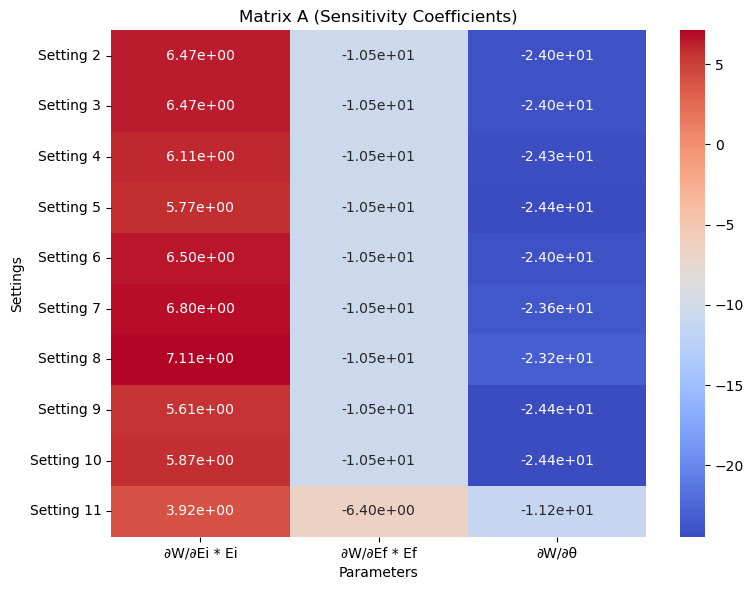

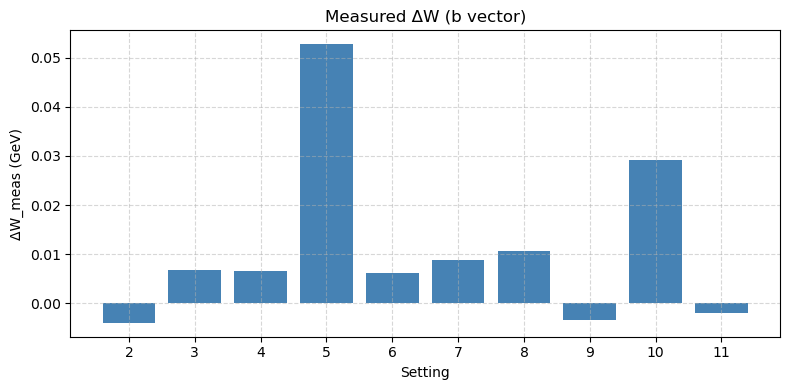

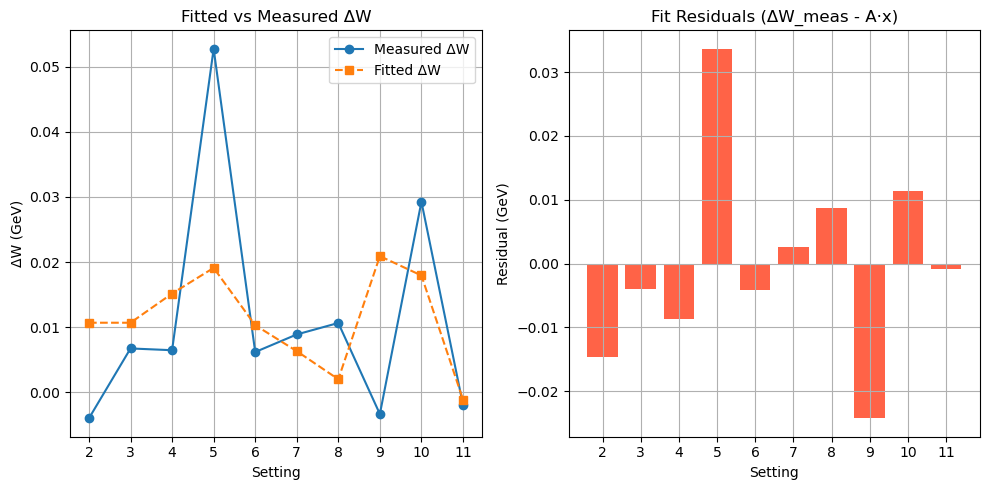

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
mp = 0.938272  # Proton mass in GeV

# Load CSV
df = pd.read_csv("settings_with_kinematics.csv")

# Filter valid rows
df_valid = df.dropna(subset=["mu_data", "mu_simc", "Electron_P_GeV", "HMS_Angle_deg"])

# Initialize matrices
A = []
b = []

for _, row in df_valid.iterrows():
    Ei = row["Beam_E_GeV"]
    Ef = row["Electron_P_GeV"]
    theta_deg = row["HMS_Angle_deg"]
    dWmeas = row["mu_data"] - row["mu_simc"]

    # Convert angle to radians
    theta_rad = np.radians(theta_deg)

    # Derivatives
    dW_dEi = Ef / Ei
    dW_dEf = -Ei / Ef

    # sin^2(theta/2) from kinematics
    sin2_half = (mp * (Ei - Ef)) / (2 * Ei * Ef)
    sin_half = np.sqrt(sin2_half)
    sin_theta = 2 * sin_half * np.sqrt(1 - sin2_half)  # sinθ = 2sin(θ/2)cos(θ/2)

    dW_dtheta = -Ei * Ef * sin_theta / mp

    A.append([dW_dEi * Ei, dW_dEf * Ef, dW_dtheta])
    b.append(dWmeas)

A = np.array(A)
b = np.array(b)

# Solve overconstrained system with least squares
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("=== Fitted Offsets ===")
print(f"dEi / Ei     = {x[0]:+.5e}")
print(f"dEf / Ef     = {x[1]:+.5e}")
print(f"dtheta (rad) = {x[2]:+.5e}")
print()
print("Residual norm:", np.linalg.norm(A @ x - b))

# Column labels
param_labels = ["∂W/∂Ei * Ei", "∂W/∂Ef * Ef", "∂W/∂θ"]

# 1. --- Matrix A heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(A, annot=True, fmt=".2e", cmap="coolwarm", xticklabels=param_labels,
            yticklabels=[f"Setting {int(s)}" for s in df_valid["Setting"]])
plt.title("Matrix A (Sensitivity Coefficients)")
plt.xlabel("Parameters")
plt.ylabel("Settings")
plt.tight_layout()
plt.savefig("diagnostic_plots/matrix_A_heatmap.png")
plt.show()


# 2. --- Vector b plot ---
plt.figure(figsize=(8, 4))
plt.bar(range(len(b)), b, color='steelblue')
plt.xticks(range(len(b)), [f"{int(s)}" for s in df_valid["Setting"]])
plt.title("Measured ΔW (b vector)")
plt.xlabel("Setting")
plt.ylabel("ΔW_meas (GeV)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("diagnostic_plots/b_vector_plot.png")
plt.show()


# 3. --- Fitted vs Measured ---
predicted_b = A @ x
residuals = b - predicted_b

plt.figure(figsize=(10, 5))

# Fitted vs Measured
plt.subplot(1, 2, 1)
plt.plot(b, 'o-', label="Measured ΔW")
plt.plot(predicted_b, 's--', label="Fitted ΔW")
plt.xticks(range(len(b)), [f"{int(s)}" for s in df_valid["Setting"]])
plt.xlabel("Setting")
plt.ylabel("ΔW (GeV)")
plt.title("Fitted vs Measured ΔW")
plt.legend()
plt.grid(True)

# Residuals
plt.subplot(1, 2, 2)
plt.bar(range(len(b)), residuals, color='tomato')
plt.xticks(range(len(b)), [f"{int(s)}" for s in df_valid["Setting"]])
plt.xlabel("Setting")
plt.ylabel("Residual (GeV)")
plt.title("Fit Residuals (ΔW_meas - A·x)")
plt.grid(True)

plt.tight_layout()
plt.savefig("diagnostic_plots/residuals_comparison.png")
plt.show()


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants
mp = 0.938  # GeV (proton mass)

# Load CSV
df = pd.read_csv("settings_with_kinematics.csv")

# Drop rows with NaNs
df = df.dropna(subset=["Beam_E_GeV", "Electron_P_GeV", "HMS_Angle_deg", "dWmeas"])

# Extract needed columns
Ei = df["Beam_E_GeV"].values
Ef = df["Electron_P_GeV"].values
theta_deg = df["HMS_Angle_deg"].values
dWmeas = df["dWmeas"].values

theta_rad = np.radians(theta_deg)
sin_theta = np.sin(theta_rad)
sin2_half_theta = np.sin(theta_rad / 2)**2

# Compute derivatives
dW_dEi = Ef / Ei
dW_dEf = -Ei / Ef
dW_dtheta = -Ei * Ef * sin_theta / mp  # Using provided formula

# Construct matrix A and vector b
A = np.vstack((dW_dEi * Ei, dW_dEf * Ef, dW_dtheta)).T  # N x 3
b = dWmeas

# === 1. Least Squares ===
x_lstsq, residuals, _, _ = np.linalg.lstsq(A, b, rcond=None)

# === 2. QR Decomposition ===
Q, R = np.linalg.qr(A)
x_qr = np.linalg.solve(R, Q.T @ b)

# === 3. SVD ===
U, S, Vt = np.linalg.svd(A, full_matrices=False)
x_svd = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# === 4. Convex Optimization (Minimize ||Ax - b||^2) ===
def objective(x): return np.linalg.norm(A @ x - b)**2
res_cvx = minimize(objective, np.zeros(3))
x_cvx = res_cvx.x

# === 5. Lagrange Multipliers (Equality-constrained least squares) ===
# Here, same as Least Squares for linear unconstrained case, shown for formality
# If needed: minimize ||Ax - b||^2 s.t. Cx = d
# But since we only have equality (Ax = b), we can solve (AᵀA)x = Aᵀb
x_lagrange = np.linalg.inv(A.T @ A) @ A.T @ b

# === Output All Methods ===
methods = {
    "Least Squares": x_lstsq,
    "QR Decomposition": x_qr,
    "SVD": x_svd,
    "Convex Optimization": x_cvx,
    "Lagrange Multipliers": x_lagrange,
}

results_df = pd.DataFrame(methods, index=["dEi/Ei", "dEf/Ef", "dtheta"])
results_df

# Optionally: Save to CSV
# results_df.to_csv("extracted_offsets_summary.csv")


,Least Squares,QR Decomposition,SVD,Convex Optimization,Lagrange Multipliers
dEi/Ei,-0.010593,-0.010593,-0.010593,-0.010596,-0.010593
dEf/Ef,-0.002263,-0.002263,-0.002263,-0.002261,-0.002263
dtheta,-0.002308,-0.002308,-0.002308,-0.002309,-0.002308


In [14]:
results_df["Least Squares"]

dEi/Ei   -0.010409
dEf/Ef   -0.002170
dtheta   -0.002295
Name: Least Squares, dtype: float64

# Diagnostic Plots

In [67]:
# === Define setting-to-SIMC mapping ===
setting_to_simcfile = {
    1: "eep_hydrogen_1249.root",
    2: "eep_hydrogen_1250.root",
    3: "eep_hydrogen_1251.root",
    4: "eep_hydrogen_1252.root",
    5: "eep_hydrogen_1253.root",
    6: "eep_hydrogen_1534.root",
    7: "eep_hydrogen_1535.root",
    8: "eep_hydrogen_1536.root",
    9: "eep_hydrogen_1714.root",
    10: "eep_hydrogen_1715_1716.root",  # you may average 1715+1716 or pick one
    11: "eep_hydrogen_6828_6841.root",  # or a merged file
}

# === Normalization factors for SIMC (normfac / nevents) ===
normfac_map = {
    1: 0.136637E+08,
    2: 0.166423E+08,
    3: 0.166435E+08,
    4: 0.164118E+08,
    5: 0.141986E+08,
    6: 0.161662E+08,
    7: 0.167196E+08,
    8: 0.167047E+08,
    9: 0.150197E+08,
    10: 0.163935E+08,
    11: 0.160009E+08
}

# === Effective charge in millicoulombs (after all efficiency corrections) ===
effective_charge_map = {
    1: 1,
    2: 39.5321,
    3: 35.1559,
    4: 23.715,
    5: 53.3532,
    6: 50.9944,
    7: 50.328,
    8: 47.3672,
    9: 68.8866,
    10: (99.026 + 79.0843),  # merged
    11: 34.4342 + 37.3549 + 38.8534 + 40.5628 + 34.9966 + 33.6797 + 46.9562 + 31.9774 + 41.2885 + 5.69914 + 40.4742 + 35.1548 + 35.5669  # sum for 6828-6840
}

# Total number of SIMC events (same across files typically)
nevents_simc = 100000


In [78]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_elastic_diagnostics(setting_input):

    # === Configurations ===
    data_dir = "./data/merged_elastics"
    simc_dir = "./data/simc"
    output_dir = "./diagnostic_plots/overlay"
    os.makedirs(output_dir, exist_ok=True)

    # === Variable Mapping ===
    variables = {
        "W": ("H.kin.W", "W", (0.8,1.1)),
        "delta": ("H.gtr.dp", "hsdelta", (-20, 10)),
        "xptar": ("H.gtr.th", "hsxptar", (-0.1, 0.1)),
        "yptar": ("H.gtr.ph", "hsyptar", (-0.05, 0.05)),
        "ytar": ("H.gtr.y", "hsytar", (-6, 6)),
        "q2": ("H.kin.Q2", "Q2", (3.5, 6)),
        "xfp": ("H.dc.x_fp", "hsxfp", (-60, 30)),
        "yfp": ("H.dc.y_fp", "hsyfp", (-30, 30)),
        "xpfp": ("H.dc.xp_fp", "hsxpfp", (-0.06, 0.06)),
        "ypfp": ("H.dc.yp_fp", "hsypfp", (-0.02, 0.02)),
    }

    # === Main ===
    setting = setting_input  # ← Change as needed
    data_file = os.path.join(data_dir, f"merged_setting_{setting}.root")
    simc_file = os.path.join(simc_dir, setting_to_simcfile[setting])
    eff_charge = effective_charge_map[setting]

    # Open ROOT files
    with uproot.open(data_file) as f_data, uproot.open(simc_file) as f_simc:
        tree_data = f_data["T"]
        tree_simc = f_simc["h10"]

        # === Load arrays for masking and plotting ===
        data_branches = [
            "H.kin.W", "H.cal.etottracknorm", "H.cer.npeSum",
            "H.gtr.th", "H.gtr.ph"
        ] + [v[0] for v in variables.values()]
        simc_branches = ["W", "hsxptar", "hsyptar", "Weight"] + [v[1] for v in variables.values()]

        data_arrs = tree_data.arrays(data_branches, library="np")
        simc_arrs = tree_simc.arrays(simc_branches, library="np")

        # === Apply masks ===
        mask_data = (
            (np.abs(data_arrs["H.kin.W"] - 0.938) < 0.15) &
            (data_arrs["H.cal.etottracknorm"] > 0.9) &
            (data_arrs["H.cer.npeSum"] > 0.5) &
            (np.abs(data_arrs["H.gtr.th"]) < 0.09) &
            (np.abs(data_arrs["H.gtr.ph"]) < 0.055)
        )

        mask_simc = (
            (np.abs(simc_arrs["W"] - 0.938) < 0.15) &
            (np.abs(simc_arrs["hsxptar"]) < 0.09) &
            (np.abs(simc_arrs["hsyptar"]) < 0.055)
        )

        simc_weights = simc_arrs["Weight"][mask_simc]
        full_weight = simc_weights * (normfac_map[setting] / nevents_simc)

        # === Create Subplots ===
        n_vars = len(variables)
        ncols = 3
        nrows = int(np.ceil(n_vars / ncols))

        fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 4))
        axs = axs.flatten()

        for i, (var, (data_branch, simc_branch, range_)) in enumerate(variables.items()):
            try:
                data_vals = data_arrs[data_branch][mask_data]
                simc_vals = simc_arrs[simc_branch][mask_simc]

                # Remove NaNs
                data_vals = data_vals[~np.isnan(data_vals)]
                simc_vals = simc_vals[~np.isnan(simc_vals)]

                # Histogram & Normalize
                bins = 100
                hist_data, bins_ = np.histogram(data_vals, bins=bins, range=range_)
                hist_simc, _ = np.histogram(simc_vals, bins=bins, range=range_, weights=full_weight)

                hist_data = hist_data / eff_charge
                if hist_data.sum() > 0:
                    hist_data = hist_data / hist_data.sum()
                if hist_simc.sum() > 0:
                    hist_simc = hist_simc / hist_simc.sum()

                bin_centers = 0.5 * (bins_[:-1] + bins_[1:])
                max_y = max(hist_data.max(), hist_simc.max()) * 1.2

                ax = axs[i]
                ax.plot(bin_centers, hist_simc, drawstyle='steps-mid', color='red', label='SIMC')
                ax.plot(bin_centers, hist_data, drawstyle='steps-mid', color='blue', label='Data')
                ax.set_ylim(0, max_y)
                ax.set_xlabel(var)
                ax.set_ylabel("Normalized Counts")
                ax.grid(True)
                ax.legend()

            except Exception as e:
                print(f"❌ Failed for {var}: {e}")
                axs[i].text(0.5, 0.5, f"Failed: {var}", ha='center', va='center')
                axs[i].axis('off')

        # Turn off unused subplots
        for j in range(i+1, len(axs)):
            axs[j].axis('off')

        run_label = df_settings[df_settings["Setting"] == setting]["Runs"].values[0]

        plt.suptitle(f"Elastic Overlay Comparison - Setting {setting}: Run {run_label}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        # plt.savefig(f"{output_dir}/overlay_allvars_setting{setting}.png")
        plt.show()


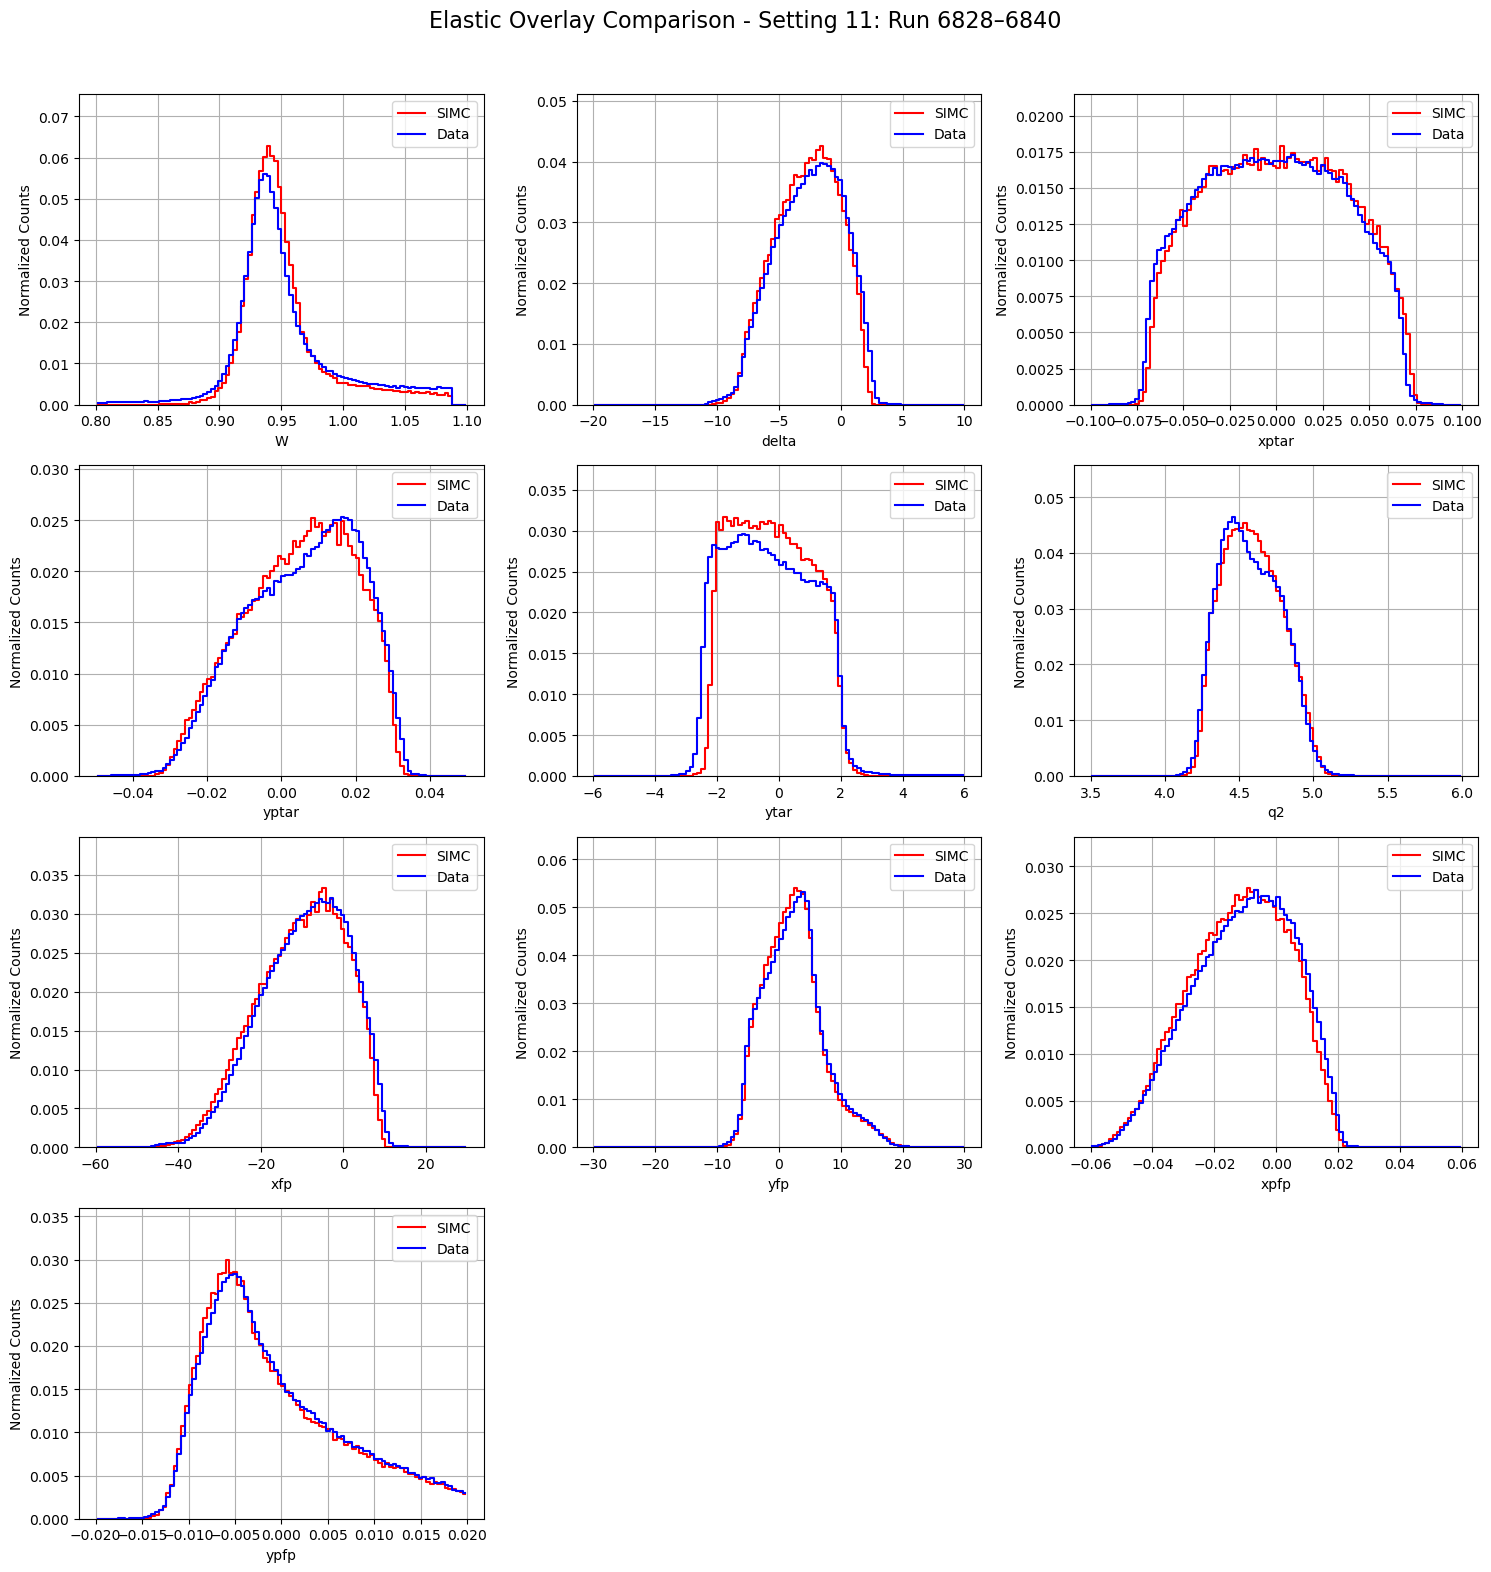

In [79]:
plot_elastic_diagnostics(11)